<a href="https://colab.research.google.com/github/Ankur099IIT/CNN-in-tensorflow--Course-2-Deeplearning.ai/blob/main/Data_Augmentation_on_the_cats_and_dogs_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**BaseLine performance**

In [3]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip

--2022-04-29 10:08:48--  https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.197.128, 173.194.198.128, 173.194.74.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip.1’

cats_and_dogs_filte 100%[===================>]  65.43M   243MB/s    in 0.3s    

2022-04-29 10:08:48 (243 MB/s) - ‘cats_and_dogs_filtered.zip.1’ saved [68606236/68606236]



In [4]:
import zipfile

zip_ref = zipfile.ZipFile('/content/cats_and_dogs_filtered.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import os

os.getcwd()

'/content'

In [6]:
base_dir = '/content/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')


train_cat_dir = os.path.join(train_dir, 'cats')
train_dog_dir = os.path.join(train_dir, 'dogs')

validation_cat_dir = os.path.join(validation_dir, 'cats')
validation_dog_dir = os.path.join(validation_dir, 'dogs')

print('Total number of cat images in training', len(os.listdir(train_cat_dir)))
print('Total number of dog images in training', len(os.listdir(train_dog_dir)))
print('Total number of cat images in validation', len(os.listdir(validation_cat_dir)))
print('Total number of cat images in validation', len(os.listdir(validation_dog_dir)))

Total number of cat images in training 1000
Total number of dog images in training 1000
Total number of cat images in validation 500
Total number of cat images in validation 500


In [7]:
# data preprocessing

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen  = ImageDataGenerator(rescale = 1.0/255.0)

training_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                       target_size = (150,150),
                                                       batch_size = 20,
                                                       class_mode = 'binary')

validation_datagen = ImageDataGenerator(rescale = 1.0/255.0)


validation_generator = validation_datagen.flow_from_directory(directory = validation_dir,
                                                              target_size = (150,150),
                                                              batch_size = 20,
                                                              class_mode = 'binary'
                                                              )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

def create_model():
  model = tf.keras.Sequential([
          tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150,150,3)),
          tf.keras.layers.MaxPooling2D(2,2),
          tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
          tf.keras.layers.MaxPooling2D(2,2),
          tf.keras.layers.Conv2D(128, (3,3), activation= 'relu'),
          tf.keras.layers.MaxPooling2D(2,2),
          tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
          tf.keras.layers.MaxPooling2D(2,2),

          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(units = 512, activation = 'relu'),
          tf.keras.layers.Dense(1, activation = 'sigmoid')
  ])

  model.compile(loss = 'binary_crossentropy',
                optimizer = RMSprop(learning_rate = 0.001),
                metrics = ['accuracy'])
  
  return model

In [9]:
model = create_model()

history = model.fit(training_generator,
                    steps_per_epoch = 100,
                    epochs = 20,
                    validation_data = validation_generator,
                    validation_steps = 50, 
                    verbose = 2)

Epoch 1/20
100/100 - 109s - loss: 0.7777 - accuracy: 0.5000 - val_loss: 0.6906 - val_accuracy: 0.5930 - 109s/epoch - 1s/step
Epoch 2/20
100/100 - 105s - loss: 0.7052 - accuracy: 0.5385 - val_loss: 0.6813 - val_accuracy: 0.5600 - 105s/epoch - 1s/step
Epoch 3/20
100/100 - 105s - loss: 0.6842 - accuracy: 0.5985 - val_loss: 0.6395 - val_accuracy: 0.6410 - 105s/epoch - 1s/step
Epoch 4/20
100/100 - 104s - loss: 0.6116 - accuracy: 0.6595 - val_loss: 0.6055 - val_accuracy: 0.6580 - 104s/epoch - 1s/step
Epoch 5/20
100/100 - 104s - loss: 0.5781 - accuracy: 0.7030 - val_loss: 0.5891 - val_accuracy: 0.6790 - 104s/epoch - 1s/step
Epoch 6/20
100/100 - 104s - loss: 0.5224 - accuracy: 0.7425 - val_loss: 0.5478 - val_accuracy: 0.7280 - 104s/epoch - 1s/step
Epoch 7/20
100/100 - 103s - loss: 0.4697 - accuracy: 0.7800 - val_loss: 0.5588 - val_accuracy: 0.7240 - 103s/epoch - 1s/step
Epoch 8/20
100/100 - 104s - loss: 0.4372 - accuracy: 0.7970 - val_loss: 0.5220 - val_accuracy: 0.7480 - 104s/epoch - 1s/step


In [14]:
import matplotlib.pyplot as plt

def plot_loss_acc(history):

  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  

  plt.plot(epochs, acc, 'r', 'Training Accuracy')
  plt.plot(epochs, val_acc, 'b', 'Validation Accuracy')
  plt.title('Training and Validation Accuracy')
  plt.show()


  plt.plot(epochs, loss, 'y', 'Training loss')
  plt.plot(epochs, val_loss, 'g', 'Validation loss')
  plt.title('Training and Validation Loss')
  plt.show()





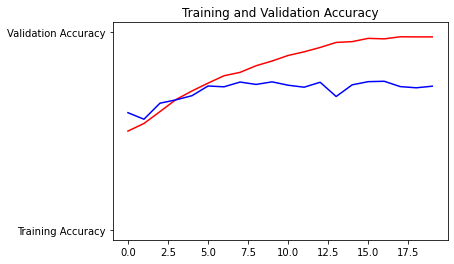

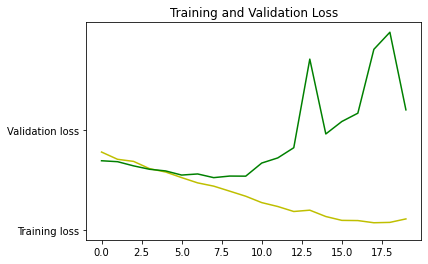

In [15]:
plot_loss_acc(history)

**Data Augmentation**

In [17]:
train_datagen_aug = ImageDataGenerator(rescale = 1.0/255.0,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   fill_mode = 'nearest')

training_generator_aug = train_datagen_aug.flow_from_directory(directory = train_dir,
                                                               target_size = (150,150),
                                                               batch_size = 20,
                                                               class_mode = 'binary')

# no change in test or validation data/images

validation_datagen = ImageDataGenerator(rescale = 1.0/255.0)


validation_generator = validation_datagen.flow_from_directory(directory = validation_dir,
                                                              target_size = (150,150),
                                                              batch_size = 20,
                                                              class_mode = 'binary'
                                                              )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [19]:
model_aug = create_model()

history_with_aug = model_aug.fit(training_generator_aug,
                                 steps_per_epoch=100,
                                 epochs = 20, 
                                 validation_data = validation_generator,
                                 validation_steps = 50,
                                 verbose = 2)

Epoch 1/20
100/100 - 115s - loss: 0.7480 - accuracy: 0.5050 - val_loss: 0.6943 - val_accuracy: 0.5000 - 115s/epoch - 1s/step
Epoch 2/20
100/100 - 113s - loss: 0.6984 - accuracy: 0.5430 - val_loss: 0.8128 - val_accuracy: 0.5380 - 113s/epoch - 1s/step
Epoch 3/20
100/100 - 113s - loss: 0.6852 - accuracy: 0.5960 - val_loss: 0.6513 - val_accuracy: 0.6220 - 113s/epoch - 1s/step
Epoch 4/20
100/100 - 113s - loss: 0.6918 - accuracy: 0.6210 - val_loss: 0.6391 - val_accuracy: 0.5880 - 113s/epoch - 1s/step
Epoch 5/20
100/100 - 113s - loss: 0.6454 - accuracy: 0.6230 - val_loss: 0.6617 - val_accuracy: 0.6250 - 113s/epoch - 1s/step
Epoch 6/20
100/100 - 112s - loss: 0.6543 - accuracy: 0.6325 - val_loss: 0.6228 - val_accuracy: 0.6300 - 112s/epoch - 1s/step
Epoch 7/20
100/100 - 112s - loss: 0.6509 - accuracy: 0.6310 - val_loss: 0.6059 - val_accuracy: 0.6620 - 112s/epoch - 1s/step
Epoch 8/20
100/100 - 112s - loss: 0.6249 - accuracy: 0.6560 - val_loss: 0.6429 - val_accuracy: 0.6660 - 112s/epoch - 1s/step


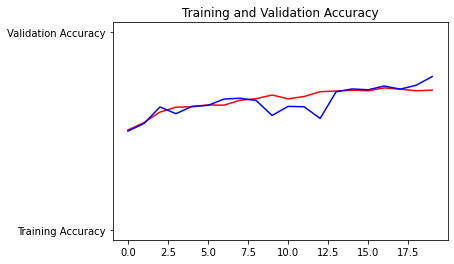

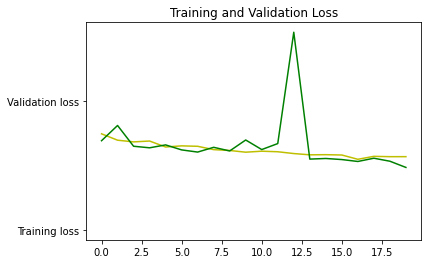

In [20]:
plot_loss_acc(history_with_aug)

In [ ]:
# Conclusion- Image Augmentation does improve the model and avoids overfitting